In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import numpy as np
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import to_categorical, plot_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path='/content/drive/My Drive/Colab Notebooks/my projects/face_mask_detection/dataset'

In [ ]:
pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import required module
from PIL import Image
  
# get image
filepath = "/content/drive/My Drive/Colab Notebooks/my projects/face_mask_detection/dataset/with_mask/1.png"
img = Image.open(filepath)

In [ ]:
# get width and height
width = img.width
height = img.height

In [ ]:
# display width and height
print("The height of the image is: ", height)
print("The width of the image is: ", width)

The height of the image is:  318
The width of the image is:  218


In [ ]:
import os

In [ ]:
print(os.listdir(train_path))

['with_mask', 'without_mask']


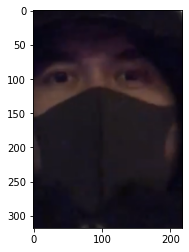

In [ ]:
plt.imshow(plt.imread("/content/drive/My Drive/Colab Notebooks/my projects/face_mask_detection/dataset/with_mask/1.png"))

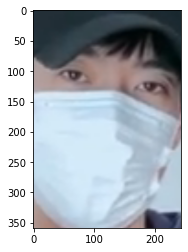

In [ ]:
plt.imshow(plt.imread("/content/drive/My Drive/Colab Notebooks/my projects/face_mask_detection/dataset/with_mask/2.png"))

In [ ]:
chilli = '/content/drive/My Drive/Colab Notebooks/my projects/face_mask_detection/dataset/with_mask'
chilli_list = os.listdir(chilli)

plt.figure(figsize=(20, 10))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    img = plt.imread(os.path.join(chilli, chilli_list[i]))
    plt.imshow(img)
    plt.axis('off')
    
plt.tight_layout()

In [ ]:
import cv2

def read_image(train_path):
    image = cv2.imread(train_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [ ]:
# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255,validation_split=0.25)

In [ ]:
# Preprocess all train images
train_generator = train_data_gen.flow_from_directory(
        '/content/drive/My Drive/Colab Notebooks/my projects/face_mask_detection/dataset',
        target_size=(48, 48),
        batch_size=32,
        color_mode="grayscale",
        class_mode='categorical',
        subset='training')

In [ ]:
# Preprocess all test images
validation_generator = train_data_gen.flow_from_directory(
        '/content/drive/My Drive/Colab Notebooks/my projects/face_mask_detection/dataset',
        target_size=(48, 48),
        batch_size=32,
        color_mode="grayscale",
        class_mode='categorical',
        subset='validation')

In [ ]:
# create model structure
from keras.models import Sequential
FaceMask_detection_model = Sequential()

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
FaceMask_detection_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 3)))
FaceMask_detection_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
FaceMask_detection_model.add(MaxPooling2D(pool_size=(3, 3)))
# pheumonia_detection_model.add(MaxPooling2D(pool_size=(3, 3)))

FaceMask_detection_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
FaceMask_detection_model.add(Dropout(0.25))

In [ ]:
FaceMask_detection_model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
FaceMask_detection_model.add(MaxPooling2D(pool_size=(3, 3)))
FaceMask_detection_model.add(Dropout(0.25))
FaceMask_detection_model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# pheumonia_detection_model.add(MaxPooling2D(pool_size=(3, 3)))
FaceMask_detection_model.add(Dropout(0.25))

In [ ]:
FaceMask_detection_model.add(Flatten())
FaceMask_detection_model.add(Dense(1024, activation='relu'))
FaceMask_detection_model.add(Dense(1024, activation='relu'))
FaceMask_detection_model.add(Dropout(0.25))
FaceMask_detection_model.add(Dense(2, activation='softmax'))

In [ ]:
FaceMask_detection_model.summary()

In [ ]:
import cv2
cv2.ocl.setUseOpenCL(False)
from tensorflow.keras.optimizers import Adam

In [ ]:
FaceMask_detection_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Train the neural network/model
FaceMask_detection_model_info = FaceMask_detection_model.fit(
        train_generator,
        # steps_per_epoch=len(train_generator)//32,
        steps_per_epoch=2883//32,
        epochs=10,
        validation_data=validation_generator,
        # validation_steps=len(validation_generator)//32)
        validation_steps=960//32)

Epoch 1/10


InvalidArgumentError: ignored

In [ ]:
# Train the neural network/model
FaceMask_detection_model_info = FaceMask_detection_model.fit(
        train_generator,
        steps_per_epoch=2883//32,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=960//32)

Epoch 1/20
90/90 [==============================] - 19s 206ms/step - loss: 0.1046 - accuracy: 0.9660 - val_loss: 0.1036 - val_accuracy: 0.9708
Epoch 2/20
90/90 [==============================] - 19s 207ms/step - loss: 0.0806 - accuracy: 0.9709 - val_loss: 0.1406 - val_accuracy: 0.9500
Epoch 3/20
90/90 [==============================] - 20s 220ms/step - loss: 0.0787 - accuracy: 0.9709 - val_loss: 0.1645 - val_accuracy: 0.9396
Epoch 4/20
90/90 [==============================] - 19s 207ms/step - loss: 0.0520 - accuracy: 0.9814 - val_loss: 0.3161 - val_accuracy: 0.8885
Epoch 5/20
90/90 [==============================] - 18s 204ms/step - loss: 0.1023 - accuracy: 0.9621 - val_loss: 0.0787 - val_accuracy: 0.9760
Epoch 6/20
90/90 [==============================] - 18s 204ms/step - loss: 0.0434 - accuracy: 0.9839 - val_loss: 0.1153 - val_accuracy: 0.9635
Epoch 7/20
90/90 [==============================] - 19s 210ms/step - loss: 0.0517 - accuracy: 0.9825 - val_loss: 0.1144 - val_accuracy: 0.9594

In [ ]:
import json
FaceMask_detection_model_info.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

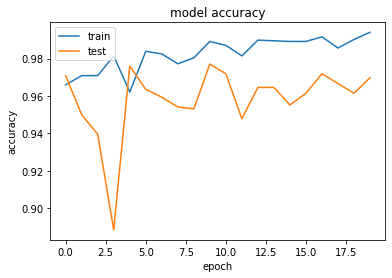

In [ ]:
plt.plot(FaceMask_detection_model_info.history['accuracy'])
plt.plot(FaceMask_detection_model_info.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

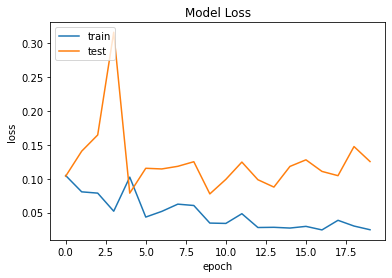

In [ ]:
plt.plot(FaceMask_detection_model_info.history['loss'])
plt.plot(FaceMask_detection_model_info.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
FaceMask_detection_model.save("/content/drive/My Drive/Colab Notebooks/my projects/face_mask_detection/FaceMaskModel.h5")